In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numba as nb
import pandas_ta
import os
import datetime
import json
import seaborn as sns
from tabulate import tabulate
import sys
sys.path.append('../..')
import vectorbt as vbt
from vectorbtpro.portfolio.enums import SizeType
from src.utils import fu
from src.utils import plot_return_mdd
from src.strategy.BackTester import BackTester
from src.strategy.Analyzer import Analyzer
from src.strategy.MultiTester import MultiTester
from src.utils import plot_return_mdd,twinx_plot # as utils
from monday import get_data,Strategy
sns.set_style("darkgrid")

In [5]:
df_dict = {}
candidate = ['BTC']
# candidate = ['SOL','ETH']
for coin in candidate:
    df_dict[coin] = get_data(coin)

APY: 12.00 %
MDD: 16.04 %
MDD Duration 326 days 02:00:00
worst trade: -10.52 %
2023-03-06 00:00:00 ~ 2023-03-10 22:00:00
avg holding days: 4.92 days
--------------------------------------------
PF: 1.58
Sharpe Ratio: 0.72
Calmar Ratio: 0.71
Sortino Ratio: 1.07
Omega Ratio: 1.07
--------------------------------------------
Expectancy : 1.18 %
Total Time Exposure : 13.73 %
Total Trades: 20
Win Rate: 60.00 %
--------------------------------------------
PF * Win Rate: 0.946


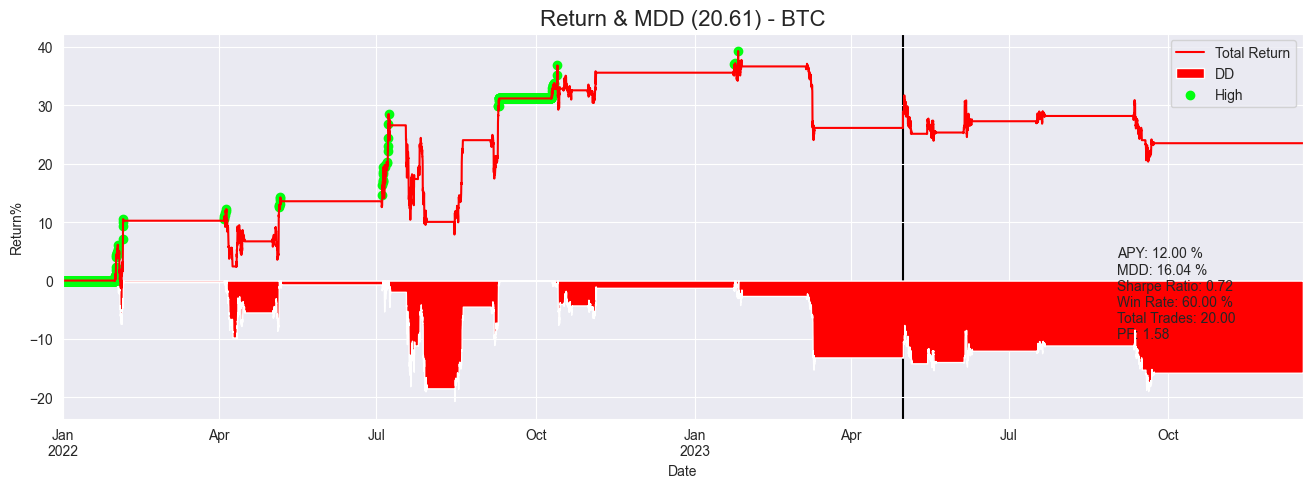

In [6]:
start = '2022-01-01'
sep = ''
end = ''

side = 'both'
params = {'vol_threshold': 0.08, 'ret_threshold': 0.1}
config = {'freq':'1h', 'lag':1, 'fee': 0.0003}
coin = 'BTC'
df = df_dict[coin]
strategy = Strategy(df=df.loc[start:], configs=config)
_pf = strategy.strategy(side = side,params=params)
trades = _pf.trades.records_readable
analyze = Analyzer(strategy)
value = analyze.show_pf_analysis(params, side, coin, axv_index=['2023-05-01'])

In [7]:
start= '2022-01-01'
end ='2023-05-01'

params={
   'vol_threshold': [0.01, 0.1, 0.005],
   'ret_threshold' : [0.1, 0.5, 0.05],
#    'sl' : [100, 101, 20],
#    'window': [12,96,4]
    }
    
config = {'freq':'1h','fee': 0.0003}
symbol_list = ['BTC']
sample_sets = [[start,end]]

multi_test = MultiTester(
    Strategy,
    get_data_func=get_data,
    params=params,
    config=config,
    df_dict=df_dict,
    symbol_list=symbol_list,
    start=start,
    end=end
    )

In [8]:
all_params = multi_test.multi_params(symbol_list,sample_sets,direction='both')
trades, value_df = multi_test.multi_params_result(all_params)
# multi_test.save_version_result(all_params,value_df,trades,1)

======================= BTC BOTH Optimize Test =======================
Optimization trails: 144


 24%|██▎       | 34/144 [00:35<01:58,  1.08s/it]